In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch

np.random.seed(42)


In [3]:

def rmse_psnr(orig_img,pred_img):
  # print(orig_img)
  # print(pred_img)
  diff = np.array(orig_img-pred_img)
  rmse = np.mean(diff**2) ** 0.5
  max_pixel = 255
  psnr = 20 * np.log10(max_pixel / rmse)
  return rmse,psnr


def gradient_descent(U, V, original_image, alpha, epochs):
    N, r = U.shape
    for epoch in range(epochs):
        predicted_image = np.dot(U, V)

        grad_U = -2 * np.dot((original_image - predicted_image), V.T)
        grad_V = -2 * np.dot(U.T, (original_image - predicted_image))

        U -= alpha * grad_U
        V -= alpha * grad_V

    return U, V

# Image patch (you can replace this with a real image patch)

# original_image = np.random.randint(0, 256, (50, 50)).astype(np.float32)


torch.Size([3, 750, 1061])


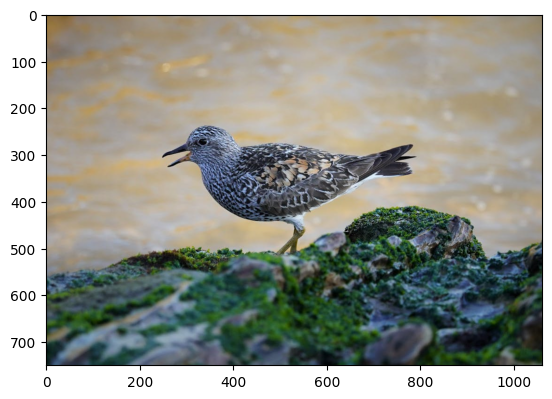

In [4]:

img = torchvision.io.read_image("image.jpeg")
print(img.shape)
# img = torch.tensor(img, dtype=torch.float)
# img = img.mean(dim=0, keepdim=False)
# print(img.shape)
# plt.imshow(img,cmap="gray")
plt.imshow(img.permute(1,2,0))



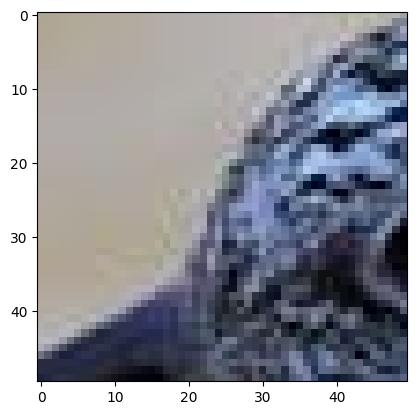

In [5]:

c_img = torchvision.transforms.functional.crop(img, 240,280, 50, 50)
plt.imshow(c_img.permute(1,2,0))
original_image = c_img


In [6]:
original_image.shape

torch.Size([3, 50, 50])

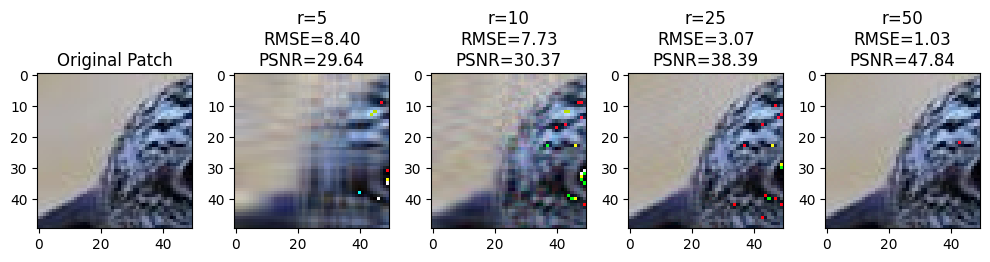

Rank: 5 , RMSE: 8.4020 , PSNR: 29.64 dB
Rank: 10 , RMSE: 7.7308 , PSNR: 30.37 dB
Rank: 25 , RMSE: 3.0710 , PSNR: 38.39 dB
Rank: 50 , RMSE: 1.0340 , PSNR: 47.84 dB


In [16]:

r_values = [5, 10, 25, 50]

# Learning rate and number of epochs for Gradient Descent
learning_rate = 0.000005
epochs = 5000

# Store RMSE and PSNR results
rmse_results = []
psnr_results = []

# Plot original image patch
plt.figure(figsize=(10, 10))
plt.subplot(1, len(r_values) + 1, 1)
plt.imshow(original_image.permute(1,2,0))
plt.title('Original Patch')

# Loop over different rank values
for i, r in enumerate(r_values):
    # Initialize U and V with random values
    N = original_image.shape[1]
    w_r = np.random.randn(N, r)
    h_r = np.random.randn(r, N)

    w_g = np.random.randn(N, r)
    h_g = np.random.randn(r, N)

    w_b = np.random.randn(N, r)
    h_b = np.random.randn(r, N)

    # Perform Gradient Descent to learn U and V
    w_r, h_r = gradient_descent(w_r, h_r, original_image[0], alpha=learning_rate, epochs=epochs)
    w_g, h_g = gradient_descent(w_g, h_g, original_image[1], alpha=learning_rate, epochs=epochs)
    w_b, h_b = gradient_descent(w_b, h_b, original_image[2], alpha=learning_rate, epochs=epochs)

    # Reconstruct the patch
    # predicted_image = np.dot(W, H)
    predicted_image = np.stack([np.dot(w_r,h_r),np.dot(w_g,h_g), np.dot(w_b,h_b)], axis=2).astype(np.uint8)

    # Computing RMSE and PSNR

    rmse,psnr = rmse_psnr(original_image.permute(1,2,0),predicted_image)
    rmse_results.append(rmse)
    psnr_results.append(psnr)

    # Plot the reconstructed patch
    plt.subplot(1, len(r_values) + 1, i + 2)
    plt.imshow(predicted_image, cmap='gray')
    plt.title(f"r={r}\nRMSE={rmse:.2f}\nPSNR={psnr:.2f}")

# Show plots
plt.tight_layout()
plt.show()

# Print RMSE and PSNR results for each rank
for i, r in enumerate(r_values):
    print(f"Rank: {r} , RMSE: {rmse_results[i]:.4f} , PSNR: {psnr_results[i]:.2f} dB")


In [8]:
print(N)

3


Below is the code for grey scale image

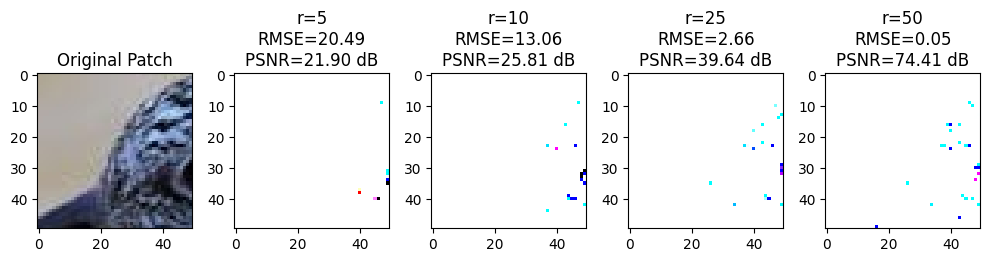

Rank: 5, RMSE: 20.4860, PSNR: 21.90 dB
Rank: 10, RMSE: 13.0619, PSNR: 25.81 dB
Rank: 25, RMSE: 2.6565, PSNR: 39.64 dB
Rank: 50, RMSE: 0.0485, PSNR: 74.41 dB


In [51]:
# r_values = [5, 10, 25, 50]
# learning_rate = 0.00001
# epochs = 50000

# rmse_results = []
# psnr_results = []

# # Plot original image patch
# plt.figure(figsize=(10, 10))
# plt.subplot(1, len(r_values) + 1, 1)
# plt.imshow(original_image.permute(1, 2, 0).cpu().numpy())  # Converting to NumPy for plotting
# plt.title('Original Patch')

# # Loop over different rank values
# for i, r in enumerate(r_values):
#     height, width = original_image.shape[1], original_image.shape[2]

#     # Initialize W and H for each channel (R, G, B) with random values
#     W_r = np.random.randn(height, r)
#     H_r = np.random.randn(r, width)

#     W_g = np.random.randn(height, r)
#     H_g = np.random.randn(r, width)

#     W_b = np.random.randn(height, r)
#     H_b = np.random.randn(r, width)

#     # Perform Gradient Descent to learn W and H for each channel
#     W_r, H_r = gradient_descent(W_r, H_r, original_image[0].cpu().numpy(), alpha=learning_rate, epochs=epochs)
#     W_g, H_g = gradient_descent(W_g, H_g, original_image[1].cpu().numpy(), alpha=learning_rate, epochs=epochs)
#     W_b, H_b = gradient_descent(W_b, H_b, original_image[2].cpu().numpy(), alpha=learning_rate, epochs=epochs)

#     # Reconstruct the patch for each channel
#     predicted_image = np.zeros((3, height, width))
#     predicted_image[0] = np.dot(W_r, H_r)  # Red channel
#     predicted_image[1] = np.dot(W_g, H_g)  # Green channel
#     predicted_image[2] = np.dot(W_b, H_b)  # Blue channel

#     # Computing RMSE and PSNR
#     rmse, psnr_value = rmse_psnr(original_image.cpu().numpy(), predicted_image)
#     rmse_results.append(rmse)
#     psnr_results.append(psnr_value)

#     predicted_image_clipped = np.clip(predicted_image.transpose(1, 2, 0), 0, 1)

#     # Plot the reconstructed patch
#     plt.subplot(1, len(r_values) + 1, i + 2)
#     plt.imshow(predicted_image_clipped)

#     # plt.imshow(np.clip(predicted_image.transpose(1, 2, 0), 0, 1))

#     # plt.imshow(np.clip(predicted_image.permute(1, 2, 0).cpu().numpy() / 255))  # Ensure valid pixel range for visualization
#     plt.title(f"r={r}\nRMSE={rmse:.2f}\nPSNR={psnr_value:.2f} dB")

# # Show all plots
# plt.tight_layout()
# plt.show()

# # Print RMSE and PSNR results for each rank
# for i, r in enumerate(r_values):
#     print(f"Rank: {r}, RMSE: {rmse_results[i]:.4f}, PSNR: {psnr_results[i]:.2f} dB")

In [50]:
# plt.imshow(np.clip(predicted_image.transpose(1, 2, 0), 0, 255))  # Ensure valid pixel range for visualization
predicted_image.shape
# print(predicted_image)

[[[174.05138079 173.99286005 173.9084608  ... 178.00208853 179.99942425
   159.00745487]
  [173.97812876 174.92070115 174.12968136 ... 170.98717295 127.00513979
   124.98747036]
  [174.95935577 175.06304996 174.00032563 ... 103.00553798 110.99874125
   160.00240565]
  ...
  [ 40.96315782  40.07641639  37.96564794 ...  69.00630893  70.9980862
    59.00194395]
  [ 40.99321926  38.0264168   35.98111898 ...  19.00007253  32.99956712
    61.00135542]
  [ 28.00554241  33.97269965  42.02604878 ...  83.99892246  73.00022566
    88.99803637]]

 [[165.8466519  166.187938   166.97541429 ... 179.01747904 181.00144433
   161.99639502]
  [166.11631643 166.85615986 167.02561789 ... 171.98452024 130.99906556
   133.00085672]
  [166.03005041 166.01775674 166.94228068 ... 105.03277057 115.99935838
   166.00306455]
  ...
  [ 42.01885358  41.98222278  41.97547947 ...  78.99646885  83.00035913
    72.99907137]
  [ 43.00023904  43.00195899  40.99587584 ...  28.99787217  45.00002521
    74.99941925]
  [ 32.9

In [30]:
# print(torch.sum(torch.isnan(original_image)))
print()

tensor(0)


From here we can see a general trend that by increasing the rank(upto certain limit) our Error(RMSE) is reduced and our PSNR(Peak signal-to-noise ratio) value is increasing.

The image with rank = 50 has very low error. We also have image size of 50 X 50. So the matrix multiplication is happening (to get predicted image) between W and H of size both 50 X 50. which is able to catch almost all the features of image.

Here our objective is to compress the image but it seems like. We didn't compress the image.
<br>
For conpression,
<br>
2*N*r < N*N 
<br>
(W and H are of size (N,r) and (r,N) and image size (N,N))
<br>
for the above equation
<br>
r < N/2
<br>
In our case, N = 50
<br>
r < 25 (For image compression) 